# Monte Carlo simulation of one stock return

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
from scipy.stats import probplot

In [ ]:
today = datetime.today()
days = timedelta(days=500)
start = today-days

In [ ]:
print('start:', start, '\t', 'end:', today)

start: 2020-08-17 18:45:48.394762 	 end: 2021-12-30 18:45:48.394762


In [ ]:
stk = 'EBAY'
stk = yf.download(stk, start, today)
df = stk['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
ret = df.pct_change(1)
ret.dropna(inplace=True)

In [ ]:
n_sim=240

In [ ]:
mu=np.mean(ret)
sigma=np.std(ret)

In [ ]:
sim_ret = pd.DataFrame(sp.random.normal(mu, sigma, n_sim))

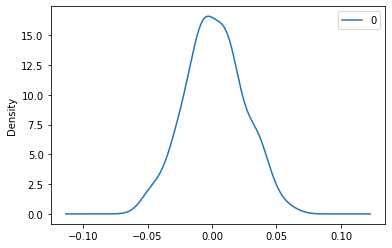

In [ ]:
# Density plot of simulated returns

sim_ret.plot.density()

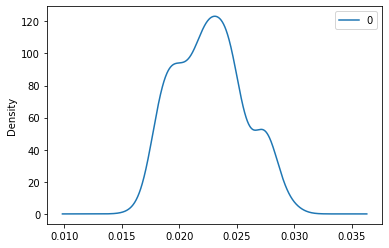

In [ ]:
# Volatility plot of simulated returns

sim_ret_std = sim_ret.rolling(window=30, min_periods=30).std()
sim_ret_std.plot.density()

In [ ]:
cumulative_ret = (sim_ret+1).cumprod() - 1

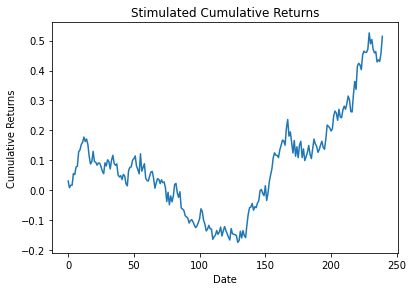

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Stimulated Cumulative Returns")
plt.show();

# Wiener Process or Brownian Motion

random walk with mean 0 and variance t

$dS(t) = \mu S(t) dt + \sigma S(t)dw$

In [ ]:
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt


def wiener_process(dt=0.1, x0=0, n=1000):

    # W(t=0)=0
    # initialize W(t) with zeros
    W = np.zeros(n+1)

    # we create N+1 timesteps: t=0,1,2,3...N
    t = np.linspace(x0, n, n+1)

    # use cumulative sum: on every step the additional value is
    # drawn from a normal distribution with mean 0 and variance dt ... N(0,dt)
    W[1:n+1] = np.cumsum(np.random.normal(0, np.sqrt(dt), n))

    return t, W


def plot_process(t, W):
    plt.plot(t, W)
    plt.xlabel('Time(t)')
    plt.ylabel('Wiener-process W(t)')
    plt.title('Wiener-process')
    plt.show()

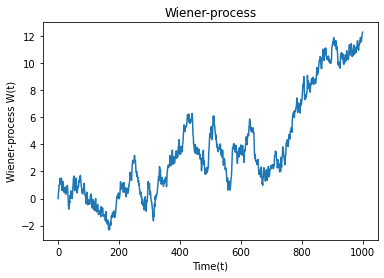

In [ ]:
time, data = wiener_process()
plot_process(time, data)

# Geometric Random Walk

$S(t) = S(0)e^{(m - \frac{1}{2}\sigma^2)t+\sigma W_t}$

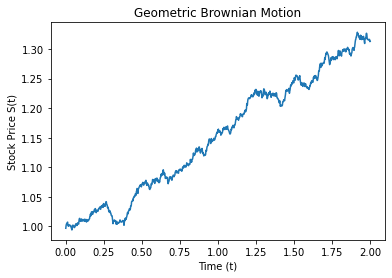

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.05):

    dt = T/N
    t = np.linspace(0, T, N)
    # standard normal distribution N(0,1)
    W = np.random.standard_normal(size=N)
    # N(0,dt) = sqrt(dt) * N(0,1)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)

    return t, S


def plot_simulation(t, S):
    plt.plot(t, S)
    plt.xlabel('Time (t)')
    plt.ylabel('Stock Price S(t)')
    plt.title('Geometric Brownian Motion')
    plt.show()


if __name__ == '__main__':

    time, data = simulate_geometric_random_walk(1)
    plot_simulation(time, data)

# Black-Scholes-Merton call option simulation

In [ ]:
import scipy as sp 
from scipy import zeros, sqrt, shape 
#
S0 = 40.              # stock price at time zero 
X= 42.                # exercise or strike price 
T =0.5                # years until maturity date
r =0.05               # risk-free rate 
sigma = 0.2           # annualized volatility of stock
n_steps=100           # number of steps 

sp.random.seed(12345) # fix these random numbers 
n_simulation = 5000   # number of simulations
dt =T/n_steps 
call = sp.zeros([n_simulation], dtype=float) 
x = range(0, int(n_steps), 1) 
for j in range(0, n_simulation): 
    sT=S0 
    for i in x[:-1]: 
        e=sp.random.normal() 
        sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sqrt(dt)) 
        call[j]=max(sT-X,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


In [ ]:
call_price=sp.mean(call)*sp.exp(-r*T) 
print('call price = ', round(call_price,3))

call price =  1.822


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  """Entry point for launching an IPython kernel.


# Call and Put Option Simulation

In [ ]:
import numpy as np
import math
import time
class OptionPricing:
 def __init__(self,S0,E,T,rf,sigma,iterations):
  self.S0 = S0
  self.E = E
  self.T = T
  self.rf = rf
  self.sigma = sigma     
  self.iterations = iterations 
 def call_option_simulation(self):
  #we have 2 columns: first with 0s the second column will store the payoff
  #we need the first column of 0s: payoff function is max(0,S-E) for call option
  option_data = np.zeros([self.iterations, 2])
  #dimensions: 1 dimensional array with as many items as the itrations
  rand = np.random.normal(0, 1, [1, self.iterations])
  #equation for the S(t) stock price
  stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)
  #we need S-E because we have to calculate the max(S-E,0)
  option_data[:,1] = stock_price - self.E   
  #average for the Monte-Carlo method
  #np.amax() returns the max(0,S-E) according to the formula
  average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
  #have to use the exp(-rT) discount factor
  return np.exp(-1.0*self.rf*self.T)*average
 def put_option_simulation(self):
  #we have 2 columns: first with 0s the second column will store the payoff
  #we need the first column of 0s: payoff function is max(0,E-S) for put option
  option_data = np.zeros([self.iterations, 2])
  #dimensions: 1 dimensional array with as many items as the itrations
  rand = np.random.normal(0, 1, [1, self.iterations])
  #equation for the S(t) stock price
  stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)
  #we need E-S because we have to calculate the max(E-S,0)
  option_data[:,1] = self.E - stock_price  
  #average for the Monte-Carlo method
  #np.amax() returns the max(0,E-S) according to the formula
  average = np.sum(np.amax(option_data, axis=1))/float(self.iterations)
  #have to use the exp(-rT) discount factor
  return np.exp(-1.0*self.rf*self.T)*average
if __name__ == "__main__":
 S0=40              #underlying stock price at t=0
 E=42               #strike price
 T = 0.5            #expiry
 rf = 0.05              #risk-free rate
 sigma=0.2              #volatility of the underlying stock
 iterations = 1000000   #number of iterations in the Monte-Carlo simulation 
 model = OptionPricing(S0,E,T,rf,sigma,iterations)
 print("Call option price with Monte-Carlo approach: ", model.call_option_simulation()) 
 print("Put option price with Monte-Carlo approach: ", model.put_option_simulation())

Call option price with Monte-Carlo approach:  1.839493690820082
Put option price with Monte-Carlo approach:  2.7979864118333277


# Interest Rate Modeling

Ornstein-Uhlenbeck Process

$dx_t = \theta(\mu-x_t)dt + \sigma dW_t$

* $\mu$ - mean value
* $\theta$ - rate by which the process reverts towards the mean
* $\sigma$ - degree of volatility around the mean

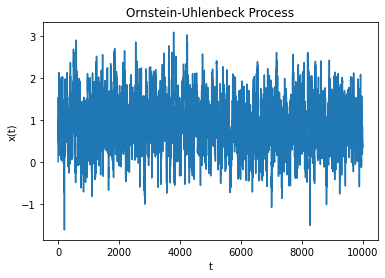

In [ ]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt


def generate_process(dt=0.1, theta=1.2, mu=0.9, sigma=0.9, n=10000):
    # x(t=0)=0 and initialize x(t) with zeros
    x = np.zeros(n)

    for t in range(1, n):
        x[t] = x[t-1] + theta*(mu-x[t-1])*dt + sigma * normal(0, np.sqrt(dt))

    return x


def plot_process(x):
    plt.plot(x)
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.title('Ornstein-Uhlenbeck Process')
    plt.show()


if __name__ == '__main__':
    data = generate_process()
    plot_process(data)

# Vasicek model

$dr(t)= \kappa(\theta-r(t))dt + \sigma dW_t$

* $r(t)$ - interest rate
* $\kappa$ - speed of mean reversion
* $\sigma dW_t$ - stochastic random noise

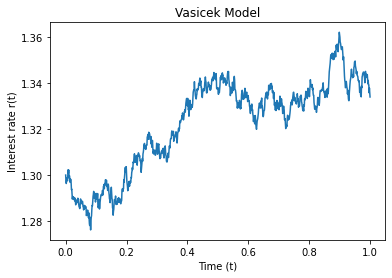

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def vasicek_model(r0, kappa, theta, sigma, T=1., N=1000):

    dt = T/float(N)
    t = np.linspace(0, T, N+1)
    rates = [r0]

    for _ in range(N):
        dr = kappa*(theta-rates[-1])*dt + sigma*np.sqrt(dt)*np.random.normal()
        rates.append(rates[-1]+dr)

    return t, rates


def plot_model(t, r):
    plt.plot(t, r)
    plt.xlabel('Time (t)')
    plt.ylabel('Interest rate r(t)')
    plt.title('Vasicek Model')
    plt.show()


if __name__ == '__main__':

    time, data = vasicek_model(1.3, 0.9, 1.4, 0.05)
    plot_model(time, data)

# Finding an efficient frontier based on two stocks by using simulation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead


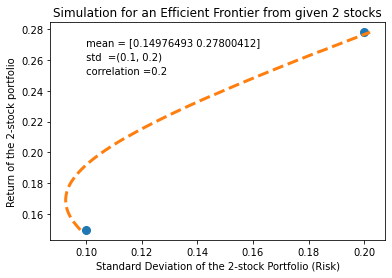

In [ ]:
import numpy as np 
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt 
from scipy.optimize import minimize

# Step 1: input area
mean_0=(0.15,0.25)   # mean returns for 2 stocks
std_0= (0.10,0.20)   # standard deviations for 2 stocks 
corr_=0.2       # correlation between 2 stocks
nSimulations=1000    # number of simulations 

# Step 2: Generate two uncorrelated time series 
n_stock=len(mean_0)
n=nSimulations
sp.random.seed(12345) # to get the same random numbers 
x1=sp.random.normal(loc=mean_0[0],scale=std_0[0],size=n) 
x2=sp.random.normal(loc=mean_0[1],scale=std_0[1],size=n) 
if(any(x1)<=-1.0 or any(x2)<=-1.0):
    print ('Error: return is <=-100%')

# Step 3: Generate two correlated time series 
index_=pd.date_range(start=dt(2001,1,1),periods=n,freq='d') 
y1=pd.DataFrame(x1,index=index_) 
y2=pd.DataFrame(corr_*x1+sp.sqrt(1-corr_**2)*x2,index=index_)

# step 4: generate a return matrix called R 
R0=pd.merge(y1,y2,left_index=True,right_index=True) 
R=np.array(R0)

# Step 5: define a few functions 
def objFunction(W, R, target_ret):
    stock_mean=np.mean(R,axis=0) 
    port_mean=np.dot(W,stock_mean)            # portfolio mean
    cov=np.cov(R.T)                           # var-covar matrix 
    port_var=np.dot(np.dot(W,cov),W.T)        # portfolio variance 
    penalty = 2000*abs(port_mean-target_ret)  # penalty 4 deviation
    return np.sqrt(port_var) + penalty        # objective function

# Step 6: estimate optimal portfolio for a given return 
out_mean,out_std,out_weight=[],[],[] 
stockMean=np.mean(R,axis=0)
#
for r in np.linspace(np.min(stockMean),np.max(stockMean),num=100): 
    W = sp.ones([n_stock])/n_stock             # start equal w
    b_ = [(0,1) for i in range(n_stock)]       # bounds
    c_ = ({'type':'eq', 'fun': lambda W: sum(W)-1. })# constraint 
    result=minimize(objFunction,W,(R,r),method='SLSQP',constraints=c_,bounds=b_)
    if not result.success:                     # handle error 
        raise BaseException(result.message)
    out_mean.append(round(r,4))                # decimal places
    std_=round(np.std(np.sum(R*result.x,axis=1)),6) 
    out_std.append(std_) 
    out_weight.append(result.x)

# Step 7: plot the efficient frontier
plt.title('Simulation for an Efficient Frontier from given 2 stocks') 
plt.xlabel('Standard Deviation of the 2-stock Portfolio (Risk)') 
plt.ylabel('Return of the 2-stock portfolio')
plt.figtext(0.2,0.80,' mean = '+str(stockMean)) 
plt.figtext(0.2,0.75,' std  ='+str(std_0)) 
plt.figtext(0.2,0.70,' correlation ='+str(corr_))
plt.plot(np.array(std_0),np.array(stockMean),'o',markersize=8) 
plt.plot(out_std,out_mean,'--',linewidth=3)
plt.show()

# Monte Carlo simulation of multiple stock returns

Portfolio Theory

$ {R}_p = Σ_{i}^nw_iR_i$
* $R_p$ - portfolio return
* $w_i$ - weight of stock $i$
* $R_{i}$ - return of stock $i$

$ \overline{R}_p = Σ_{i}^nw_i\overline{R}_i$
* $ \overline{R}_p$ - mean or expected portfolio return
* $\overline{R}_i$ - mean or expected return for stock $i$

$\sigma^2_p = \Sigma_i^n\Sigma_j^nw_iw_j\sigma_{ij}$
* $\sigma^2_p$ - portfolio variance
* $w_{i}$ - weight of stock $i$
* $\sigma_i\sigma_j$ - covariance between stock $i$ and $j$

Stock $i$ variance: $\sigma^2_i =\frac{\sum_{i}^n(R_{i}-\overline{R}_i)^2}{n-1}$

Stock $i$ standard deviation: $\sigma_i = \sqrt{\sigma_i^2}$

Covariance between stocks $i$ and $j$: $\sigma_{i,j} = \frac{\sum_{i}^n(R_{i}-\overline{R}_i)(R_{j}-\overline{R}_j)}{n-1}$

Correlation between stocks $i$ and $j$: $ρ_{i,j} = \frac{σ_{i,j}}{σ_i*σ_j}$

In [ ]:
stk1 = 'EBAY'
stk1 = yf.download(stk1, start, today)
stk1 = stk1['Adj Close']

stk2 = 'UA'
stk2 = yf.download(stk2, start, today)
stk2 = stk2['Adj Close']

stk3 = 'NKE'
stk3 = yf.download(stk3, start, today)
stk3 = stk3['Adj Close']

stk4 = 'BBY'
stk4 = yf.download(stk4, start, today)
stk4 = stk4['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stk_portfolio = pd.concat([stk1,stk2,stk3,stk4],axis=1)
stk_portfolio.columns = ['EBAY','UA','NKE','BBY']

In [ ]:
stk_portfolio_returns = stk_portfolio.pct_change(1).dropna()

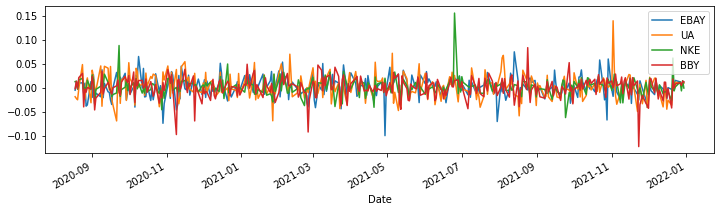

In [ ]:
stk_portfolio_returns.plot(figsize=(12,3))

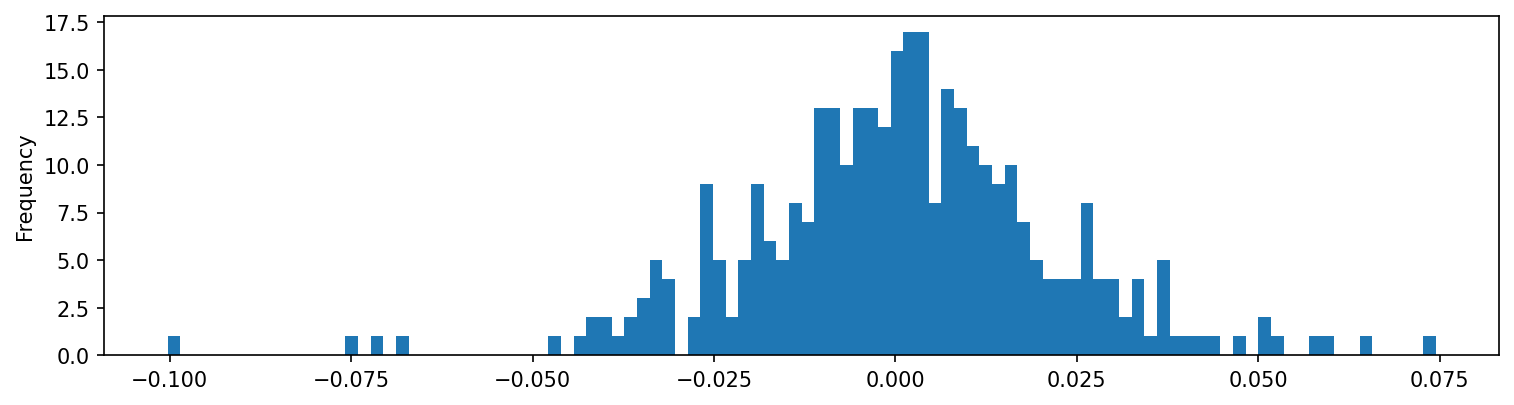

In [ ]:
plt.figure(dpi=150)
stk_portfolio_returns['EBAY'].plot(kind='hist',bins=100,figsize=(12,3))

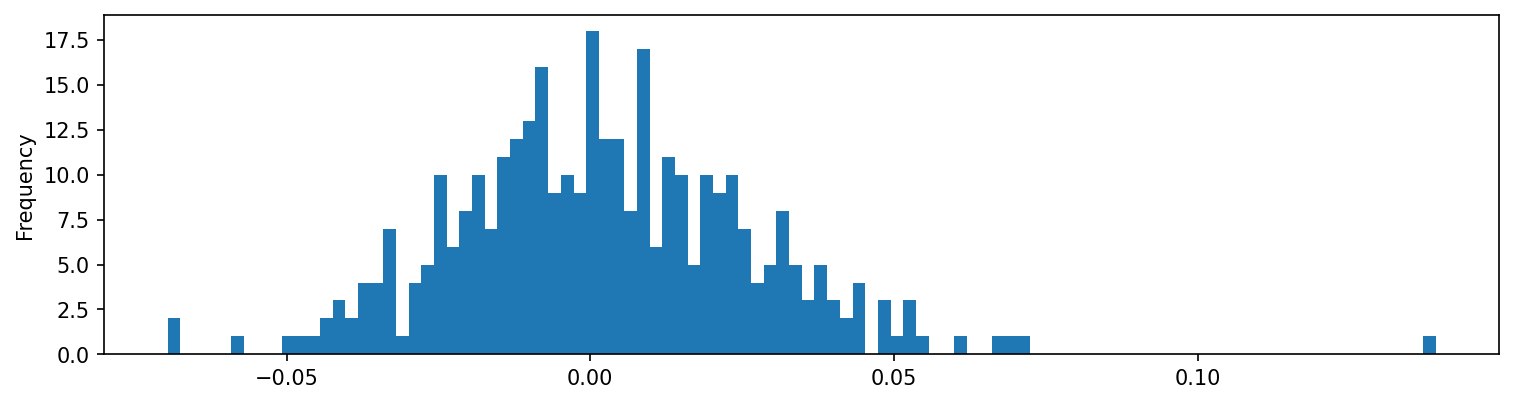

In [ ]:
plt.figure(dpi=150)
stk_portfolio_returns['UA'].plot(kind='hist',bins=100,figsize=(12,3))

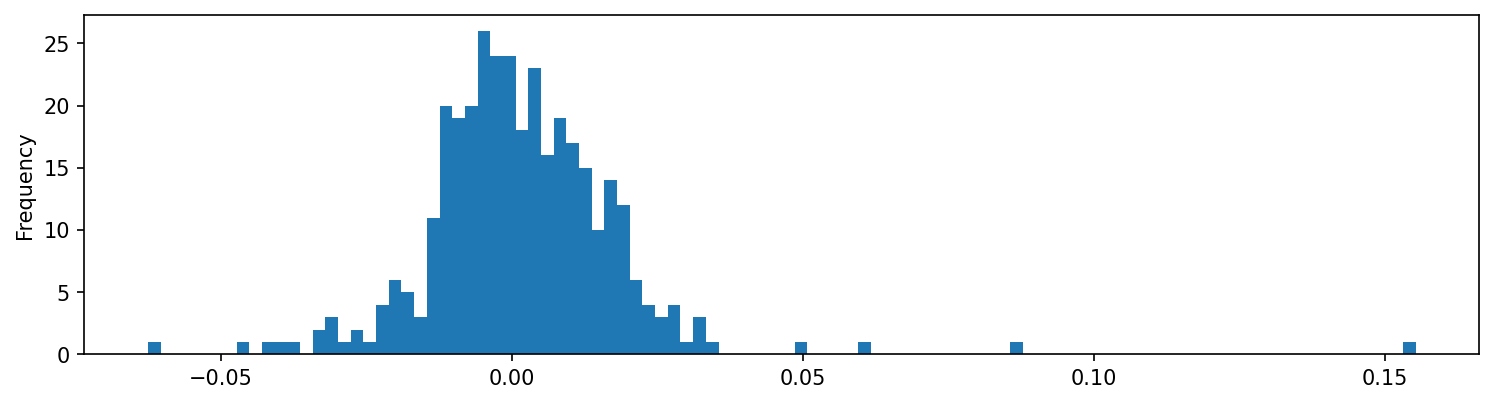

In [ ]:
plt.figure(dpi=150)
stk_portfolio_returns['NKE'].plot(kind='hist',bins=100,figsize=(12,3))

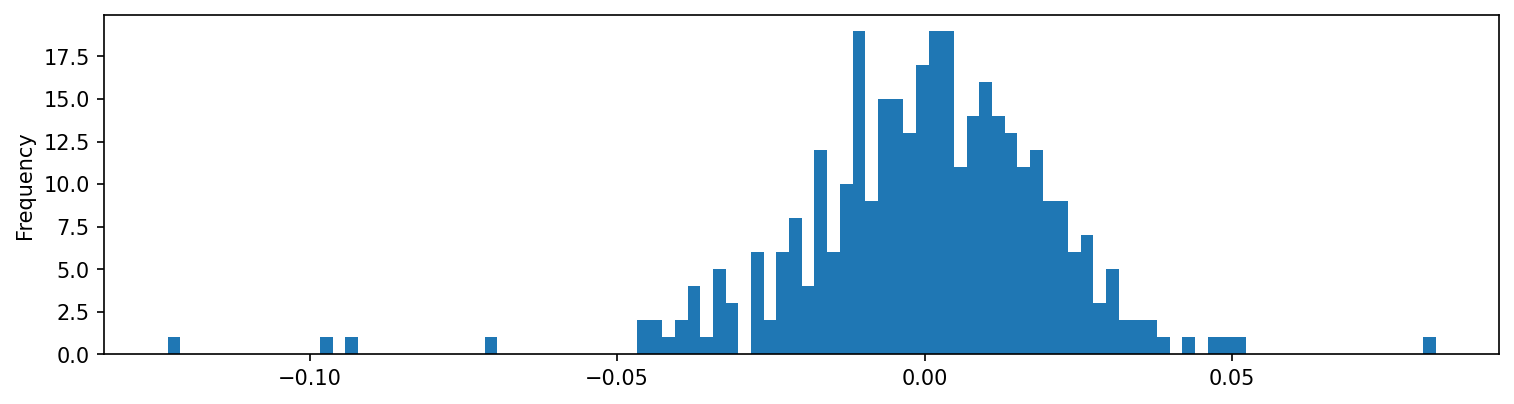

In [ ]:
plt.figure(dpi=150)
stk_portfolio_returns['BBY'].plot(kind='hist',bins=100,figsize=(12,3))

Text(0, 0.5, 'Cumulative Return as %')

<Figure size 900x600 with 0 Axes>

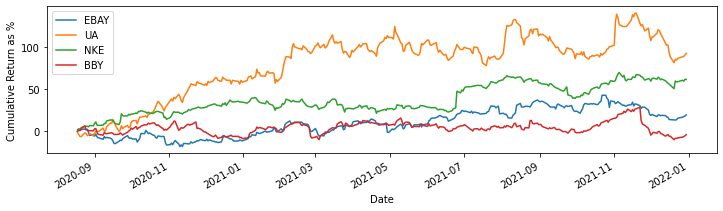

In [ ]:
cumul_return = (1 + stk_portfolio_returns).cumprod() - 1
cumul_return_perc = cumul_return*100

plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(12,3))
plt.ylabel("Cumulative Return as %")

In [ ]:
# Portfolio Weights

N = len(stk_portfolio_returns.columns)
equal_weights = N * [1/N]

equal_weights

[0.25, 0.25, 0.25, 0.25]

In [ ]:
equal_returns = np.dot(equal_weights,stk_portfolio_returns.transpose())

In [ ]:
cum_equal_returns =   (1 + equal_returns).cumprod() - 1

In [ ]:
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)
cum_equal_returns_perc.index = stk_portfolio_returns.index

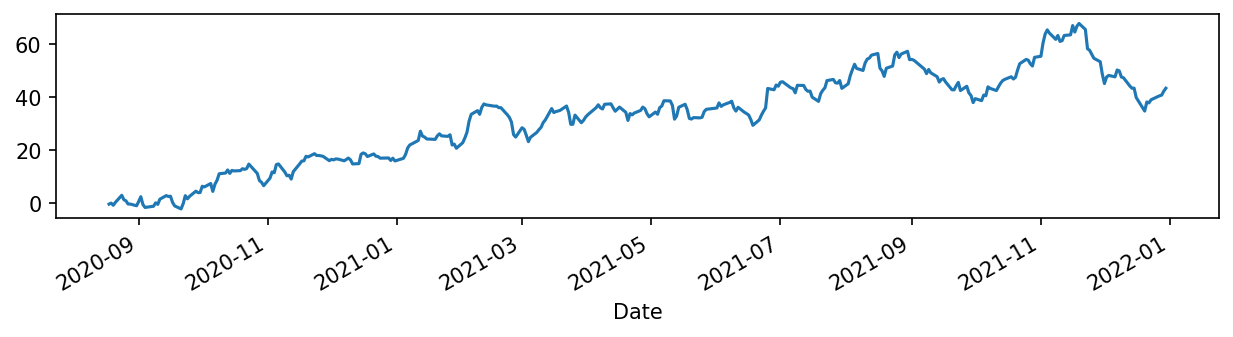

In [ ]:
# Portfolio plot show % return

plt.figure(dpi=150)
cum_equal_returns_perc.plot(figsize=(10,2))

In [ ]:
# log returns

log_rets = np.log(stk_portfolio/stk_portfolio.shift(1))

In [ ]:
stk_portfolio_returns

,EBAY,UA,NKE,BBY
Date,,,,
2020-08-18,-0.005580,-0.019129,0.012398,-0.002437
2020-08-19,0.011924,-0.022752,0.013275,0.013029
2020-08-20,-0.000866,-0.025499,-0.003506,-0.002322
2020-08-21,0.009539,-0.002275,0.016110,0.020591
2020-08-24,0.009792,0.047890,0.018952,0.029561
...,...,...,...,...
2021-12-23,0.014858,0.010945,0.001390,0.007292
2021-12-27,0.011866,0.009687,0.011529,0.010196
2021-12-28,0.006397,0.002822,-0.006922,0.004441


In [ ]:
log_rets

,EBAY,UA,NKE,BBY
Date,,,,
2020-08-17,NaN,NaN,NaN,NaN
2020-08-18,-0.005596,-0.019314,0.012322,-0.002440
2020-08-19,0.011853,-0.023015,0.013187,0.012945
2020-08-20,-0.000867,-0.025830,-0.003512,-0.002325
2020-08-21,0.009493,-0.002278,0.015981,0.020382
...,...,...,...,...
2021-12-23,0.014748,0.010885,0.001389,0.007265
2021-12-27,0.011796,0.009640,0.011463,0.010144
2021-12-28,0.006376,0.002818,-0.006946,0.004431


In [ ]:
# Generate random portfolio weights
N = len(stk_portfolio_returns.columns)

weights = np.random.random(N)

In [ ]:
np.sum(weights)

2.2571480492916436

In [ ]:
# Function used to generate random weights

def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

In [ ]:
# Functino used to return portfolio returns

def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 #Annualized Returns

In [ ]:
log_rets_cov = log_rets.cov()
log_rets_cov

,EBAY,UA,NKE,BBY
EBAY,0.000464,0.000037,0.000067,0.000146
UA,0.000037,0.000612,0.000175,0.000153
NKE,0.000067,0.000175,0.000288,0.000106
BBY,0.000146,0.000153,0.000106,0.000457


In [ ]:
# Function used to return portfolio volatility

def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [ ]:
calculate_volatility(weights,log_rets_cov)

0.5359518722981912

In [ ]:
# Create many random weights

mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [ ]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

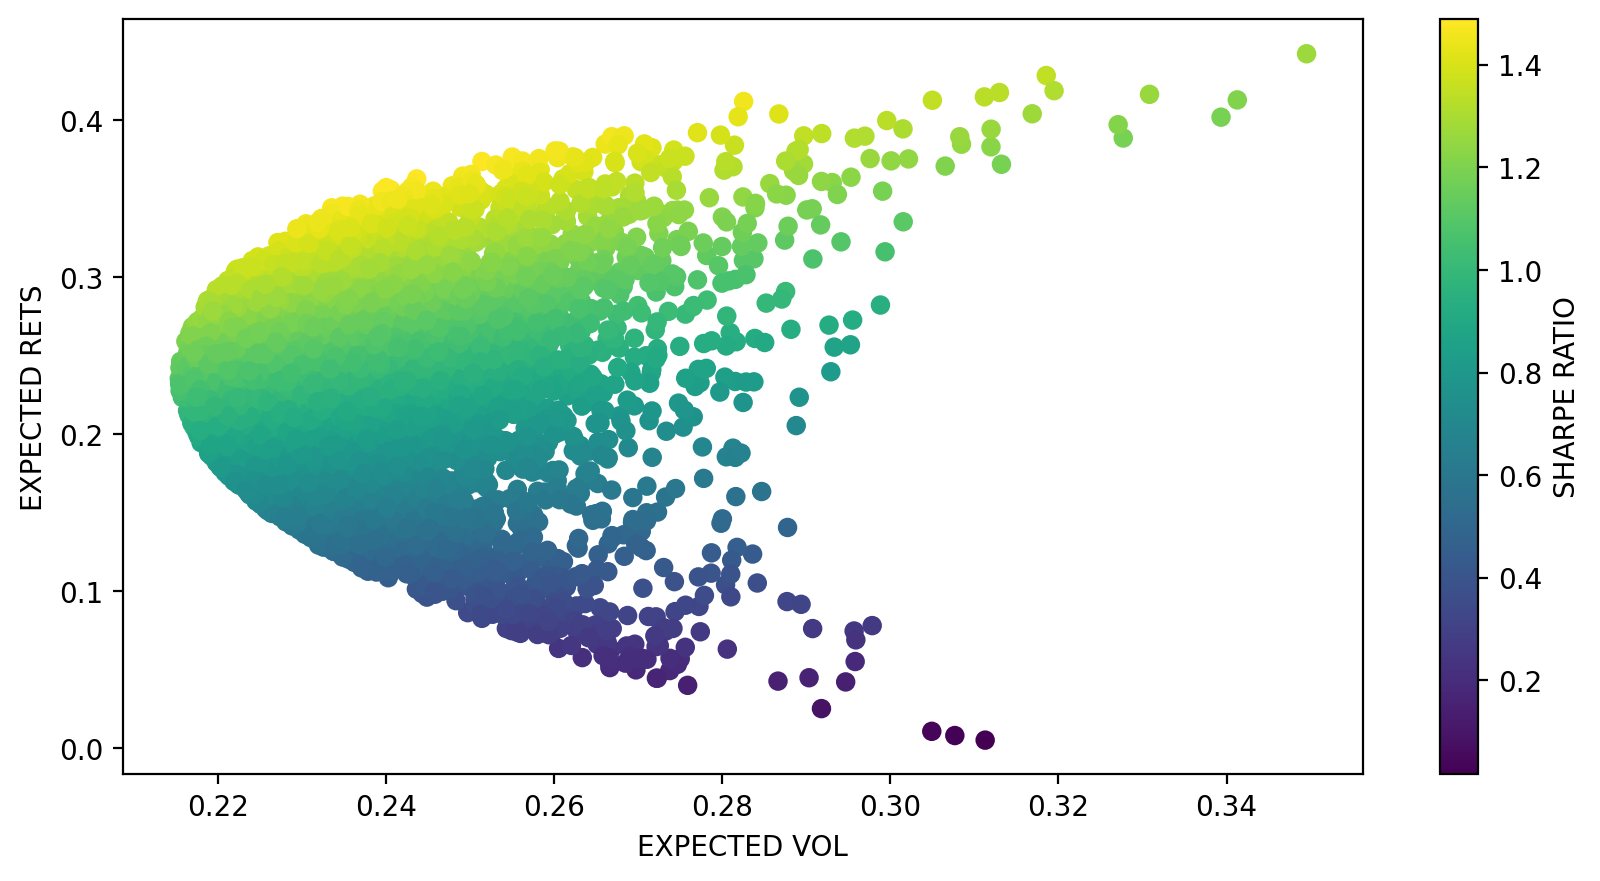

In [ ]:
# plot of expected return vs. expected volatility (colored them by Sharpe Ratio)
# Efficient frontier

plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.ylabel('EXPECTED RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");

In [ ]:
# Portfolio mix with highest Sharpe Ratio
mc_weights[np.argmax(mc_sharpe_ratios)]

array([0.12774428, 0.34620054, 0.52036939, 0.00568579])

# Optimal Weighting through Minimization Search

In [ ]:
from scipy.optimize import minimize

In [ ]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [ ]:
bounds = tuple((0,1) for n in range(N))

In [ ]:
# Bound for each weighting (we only go long)
bounds

((0, 1), (0, 1), (0, 1), (0, 1))

In [ ]:
# Starting Guess
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [ ]:
# Need to constrain all weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [ ]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

     fun: -1.4992256516003442
     jac: array([-4.43458557e-05,  1.67578459e-04, -9.60826874e-05,  8.80775243e-01])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([7.19720966e-02, 3.50257442e-01, 5.77770461e-01, 2.71050543e-17])

In [ ]:
# Based on above results, optimal portfolio allocation:
## 7% in EBAY
## 35% in UA
## 57% in NKE
## 1% in BBY

## Efficient Frontier

In [ ]:
expected_returns_range = np.linspace(0.18,0.28,100)

In [ ]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [ ]:
def calculate_volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [ ]:
frontier_volatility = []

for possible_return in expected_returns_range:
    # function for return
    
    
    result = minimize(calculate_volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])

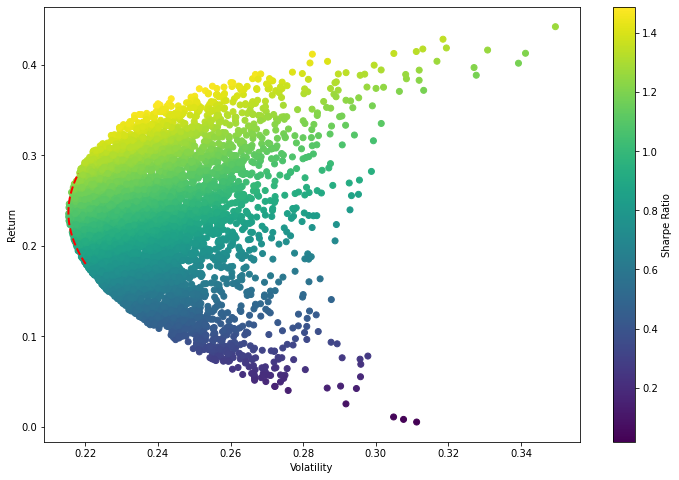

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)